### Kristen: reading multi-frame tiff images using PIL

### import packages

In [1]:
import skimage 
import cv2 as cv
from skimage import data, io, filters, measure
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize
from PIL import Image
import numpy as np

### method #1 (manual)

* manually cycle through the known # of frames
* convert each frame to numpy array

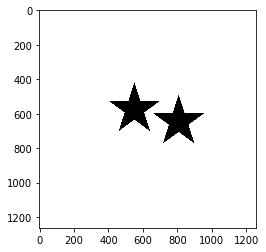

In [2]:
img = Image.open('test_stack.tif')
imstack = []
for ii in range(10):
    try:
        img.seek(ii)
        imstack.append(np.array(img))
    except EOFError:
        # not enough frames in image
        break

plt.imshow(imstack[8])

### PIL.ImageSequence

* iterator object can loop over the image sequence
* you can also index into the iterator with `[]`

https://www.geeksforgeeks.org/python-pil-imagesequence-iterator/  
https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#image-sequences  
https://stackoverflow.com/questions/18602525/python-pil-for-loop-to-work-with-multi-image-tiff

In [3]:
from PIL import ImageSequence

### method #2 (simplest, with iterator)

* simply index into the iterator object with `[]`

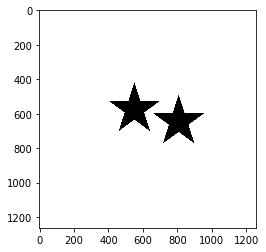

In [4]:
img = Image.open('test_stack.tif')
imgit = ImageSequence.Iterator(img)

plt.imshow(imgit[8])

### method #3 (manual with iterator)

* use iterator to loop through the frame indices
* use `Image.seek()` to select the correct frame
* then convert the frame to numpy array

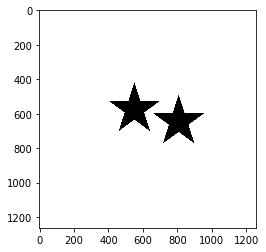

In [5]:
img = Image.open('test_stack.tif')
imstack = []

for (ii,frame) in enumerate(ImageSequence.Iterator(img)):
    img.seek(ii)
    frame = np.array(img)
    imstack.append(frame)
    if ii==8:
        testframe = frame

# plt.imshow(testframe)
plt.imshow(imstack[8])


### method #4 (with iterator, but not working)

* use iterator to loop through the frames directly
* for some reason, each frame saved is still the first frame

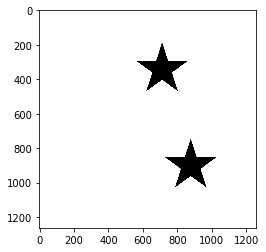

In [6]:
img = Image.open('test_stack.tif')
imstack = []

for (ii,frame) in enumerate(ImageSequence.Iterator(img)):
    imstack.append(frame)
    if ii==8:
        testframe = frame

plt.imshow(imstack[8])
# plt.imshow(testframe)
